**<center><font size=5.5>Brain Tumor Detection with VGG - 16 Model using Transfer Learning**</font></center>
*******
#### Table of Contents:
- <a href='#def'> Initial Definitions:</a>
    - <a href='#brain'> a) Brain Tumor</a>
    - <a href='#neural'> b) Convolutional Neural Network (CNN)</a>
    - <a href='#visual'> c) Visual Geometry Group 16-Layer Model (VGG-16)</a>
    - <a href='#transfer'> d) Transfer Learning</a>
    - <a href='#augment'> e) Data Augmentation</a>
- <a href='#project'> Project Objective & Overview:</a>
    - <a href='#data'> Dataset Description</a>
- <a href='#env'> Setting up the Environment</a>
- <a href='#import'> Data Import & Preprocessing</a>
- <a href='#cnn'> Convolutional Neural Network (CNN) Model</a>
    - <a href = '#aug'>Data Augmentation</a>
        - <a href = '#demo'>Demonstration</a>
        - <a href = '#apply'>Application</a>
    - <a href = '#build'>Building the Model</a>
    - <a href = '#perf'>Model Performance</a>
- <a href='#concl'>Conclusions</a>

# <a id='#def'>Initial Definitions:</a>
All the terms define below are used or applied through this brain tumor detection project.

## <a id='brain'> a) Brain Tumor:</a>
> A brain tumor occurs when abnormal cells form within the brain. There are two main types of tumors: cancerous (malignant) tumors and benign tumors. Cancerous tumors can be divided into primary tumors, which start within the brain, and secondary tumors, which have spread from elsewhere, known as brain metastasis tumors.  
>All types of brain tumors may produce symptoms that vary depending on the part of the brain involved. These symptoms may include headaches, seizures, problems with vision, vomiting and mental changes. The headache is classically worse in the morning and goes away with vomiting. Other symptoms may include difficulty walking, speaking or with sensations. As the disease progresses, unconsciousness may occur.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/5/5f/Hirnmetastase_MRT-T1_KM.jpg)
>
> *Brain metastasis in the right cerebral hemisphere from lung cancer, shown on magnetic resonance imaging.*  
>
> Further Information: [Brain Tumor](https://en.wikipedia.org/wiki/Brain_tumor)

## <a id='neural'> b) Convolutional Neural Network (CNN):</a>
> Convolutional Neural Network is a type of deep neural network commonly used in machine learning and computer vision tasks, particularly for image recognition and classification. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input data. They employ convolutional layers that apply filters to input data, pooling layers to reduce spatial dimensions, and typically include fully connected layers for classification or regression tasks. CNNs have been highly successful in various applications such as image recognition, object detection, and image segmentation.
>
> ![](https://images.contentstack.io/v3/assets/bltb654d1b96a72ddc4/bltbce9a55b60435fb5/65692556ec79944dfa96a2ea/3-SPC-Blog-6-neural-network-you-need-to-know.png)
>
> Further Information: [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network)

## <a id='visual'> c) Visual Geometry Group 16-Layer Model (VGG-16):</a>
> Visual Geometry Group 16-Layer Model (VGG-16) is a specific convolutional neural network architecture that was developed by the Visual Geometry Group (VGG) at the University of Oxford. VGG-16 is characterized by its deep architecture consisting of 16 layers, primarily composed of convolutional layers followed by max-pooling layers. It has relatively simple 3x3 convolutional filters with a fixed stride and padding, which helps in preserving spatial resolution. VGG-16 gained popularity for its simplicity and effectiveness, particularly in image classification tasks.
>
>![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*CrjJwSX9S7f759dK2EtGJQ.png)
>
> Further Information: [Visual Geometry Group (VGG)](https://www.geeksforgeeks.org/vgg-16-cnn-model/)

## <a id='transfer'> d) Transfer Learning:</a>
> In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size.  
> Transfer learning is a machine learning technique where a model trained on one task is reused or adapted as a starting point for a different but related task. Instead of training a new model from scratch, transfer learning leverages the knowledge gained from solving one problem and applies it to a new, similar problem.  
> In transfer learning, the pre-trained model, often called the "source model," is typically a deep neural network trained on a large dataset for a specific task, such as image classification. Instead of discarding this knowledge after training, transfer learning fine-tunes the pre-trained model's parameters or uses its learned representations as features for the new task, which is known as feature extraction.
>
>![](https://www.freetimelearning.com/images/interview_questions/transfer_learning.jpg)
>
> Further Information: [Transfer Learning](https://en.wikipedia.org/wiki/Transfer_learning)

## <a id='augment'> e) Data Augmentation:</a>
> Data augmentation is a technique commonly used in machine learning and deep learning to increase the diversity and size of a training dataset by applying a variety of transformations to the existing data samples.  
> Data augmentation is particularly useful in scenarios where the size of the training dataset is limited or when the dataset is unbalanced, as it helps prevent overfitting and improves the model's ability to generalize to unseen data. It is commonly used in tasks such as image classification, object detection, and natural language processing.
>
>![](https://www.researchgate.net/publication/319413978/figure/fig2/AS:533727585333249@1504261980375/Data-augmentation-using-semantic-preserving-transformation-for-SBIR.png)
>
> Further Information: [Data Augmentation](https://en.wikipedia.org/wiki/Data_augmentation)

# <a id='project'> Project Objective & Overview:</a>
The main objective of this project is to build a Convolutional Neural Network (CNN) model that would classify if subject has a brain tumor or not, based on the MRI scanned images. I'm using the VGG-16 model architecture & weights to train the model for this binary problem.

## <a id='data'> Dataset Description:</a>
The data images that are used for this problem is [Brain MRI Images for Brain Tumor Detection](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection). It consists of MRI scans of two classes:

* `NO` : No Tumor. Encoded as `0`
* `YES` : Tumor. Encoded as `1`

# <a id='env'>Setting up the Environment:</a>

In [1]:
from IPython.display import clear_output
!pip install imutils
clear_output()

# These code lines clear the output to avoid displaying 
# installation messages in the notebook.

In [2]:
import numpy as np 
from tqdm import tqdm # Progress Bars
import cv2
import os
import shutil
import itertools
import imutils # Image Processing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

import warnings
warnings.filterwarnings('ignore')

All the MRI scanned images are in one folder with `Yes` & `No` subfolders. Splitting the images into three folders `Train`, `Validation` & `Test` which makes the images easier to work with.

In [3]:
IMG_PATH = 'brain_tumor_dataset/'

# Create directories if they don't exist
for directory in ['TEST/YES/', 'TEST/NO/', 'TRAIN/YES/', 'TRAIN/NO/', 'VAL/YES/', 'VAL/NO/']:
    os.makedirs(directory, exist_ok=True)

# split the data by train/val/test
for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 5:
                shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
            elif n < 0.8*IMG_NUM:
                shutil.copy(img, 'TRAIN/'+ CLASS.upper() + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'VAL/'+ CLASS.upper() + '/' + FILE_NAME)

# <a id='import'> Data Import & Preprocessing:</a>

In [4]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = cv2.resize(img, img_size)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

This function `load_data` takes a directory path `(dir_path)` and an optional argument `(img_size)` to resize images. It loads images from the specified directory, resizes them, and stores them as NumPy arrays along with their corresponding labels.

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Display confusion matrix
    plt.title(title)  # Set title
    plt.colorbar()  # Add color bar
    tick_marks = np.arange(len(classes))  
    plt.xticks(tick_marks, classes, rotation=90)  
    plt.yticks(tick_marks, classes)  # Set y-axis labels
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix

    thresh = cm.max() / 2.  # Calculate threshold for text color
    cm = np.round(cm,2)  # Round values in confusion matrix to two decimal places
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # Iterate over each cell in confusion matrix
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")  # Add text to cells with appropriate color
    plt.tight_layout()  
    plt.ylabel('True Label')  
    plt.xlabel('Predicted Label')  
    plt.show()  

This function `plot_confusion_matrix` is used to display a confusion matrix visually using matplotlib. It takes the confusion matrix `(cm)`, a list of class names `(classes)`, and optional parameters like normalization `(normalize)`, title `(title)`, and color map `(cmap)`.

In [6]:
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
VAL_DIR = 'VAL/'
IMG_SIZE = (224,224)

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


193 images loaded from TRAIN/ directory.


100%|██████████| 2/2 [00:00<00:00, 30.60it/s]


10 images loaded from TEST/ directory.


100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

50 images loaded from VAL/ directory.


Let's take a look at the distribution of classes among sets:

In [7]:
y = dict()
y[0] = []
y[1] = []

# Loop through sets (y_train, y_val, y_test)
for set_name in (y_train, y_val, y_test):
    # Append count of class 0 in each set
    y[0].append(np.sum(set_name == 0))
    # Append count of class 1 in each set
    y[1].append(np.sum(set_name == 1))

# Create Bar trace for class 0
trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7)

# Create Bar trace for class 1
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7)

data = [trace0, trace1]
layout = go.Layout(
    title='Count of Classes in each Set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'})

fig = go.Figure(data, layout)
iplot(fig)

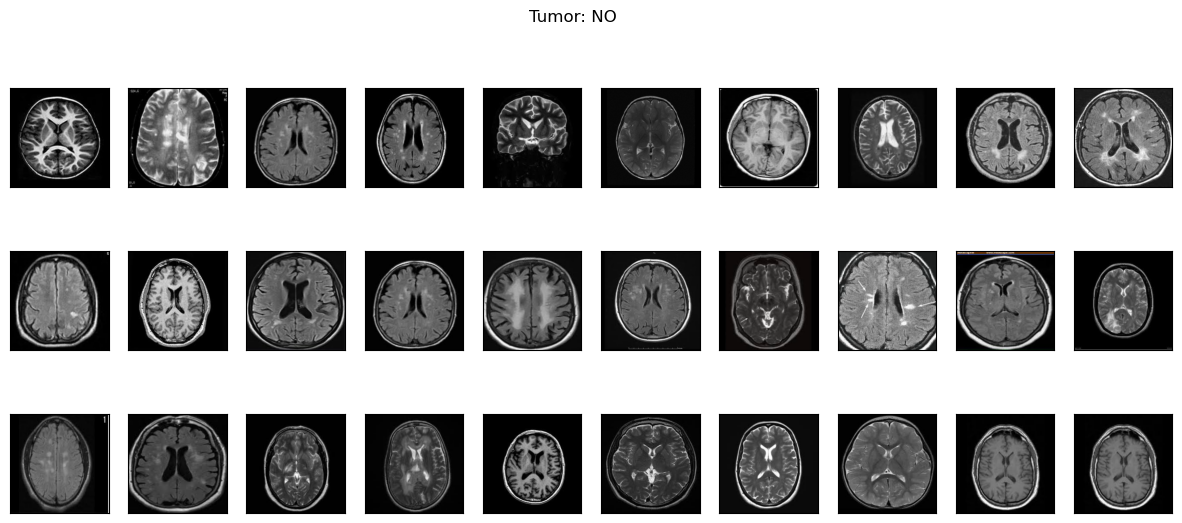

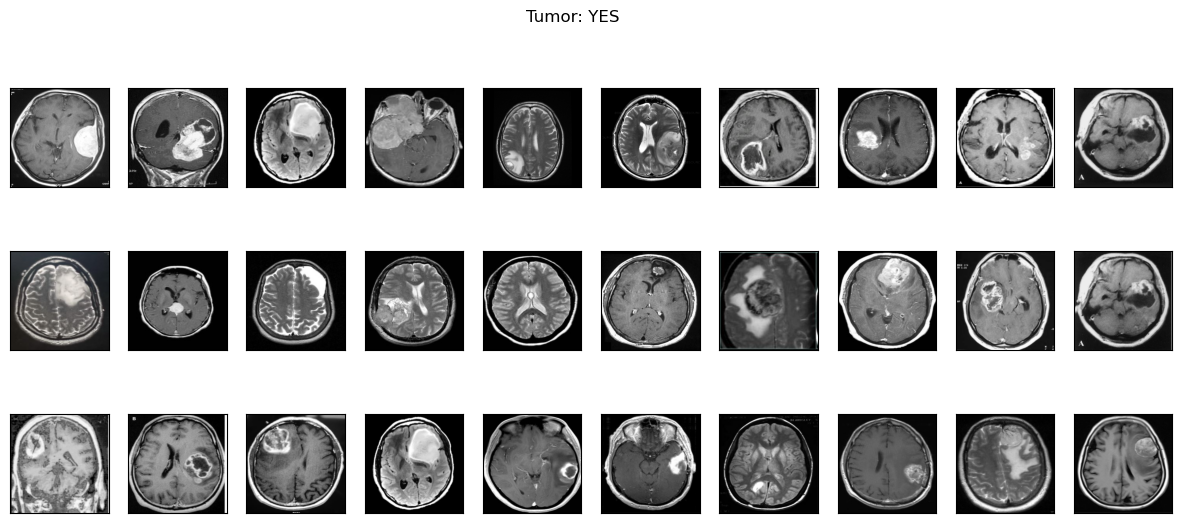

In [8]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    # Iterate through each label index
    for index in range(len(labels_dict)):
        # Select 'n' images for the current label
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)  # Calculate number of rows for subplot grid

        # Create a plot with specified size
        plt.figure(figsize=(15,6))
        c = 1
        # Iterate over images and plot them
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])
            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

plot_samples(X_train, y_train, labels, 30)

We observe that the images have different `width` & `height` and different size of `black corners`.  
Since the image size for VGG-16 input layer is `(224, 224)`, some wide images may look weird after resizing.  

The first step of "normalization" would be to crop the brain out of the images.  
The function `crop_imgs` takes in a set of images `set_name` and an optional parameter `add_pixels_value`, which specifies the number of pixels to add around the cropped region. It then crops each image based on the extreme points found using contour detection.

In [9]:
def crop_imgs(set_name, add_pixels_value=0, target_size=(100, 100)):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    # Iterate over each image in the set
    for img in set_name:
        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Apply Gaussian blur to reduce noise
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # Threshold the image to create a binary image
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        # Perform erosion and dilation to remove noise
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # Find contours in the thresholded image
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        # Get the contour with the maximum area
        c = max(cnts, key=cv2.contourArea)

        # Find extreme points of the contour
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        # Crop the image using extreme points and additional pixels
        cropped_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        
        # Resize the cropped image to the target size
        resized_img = cv2.resize(cropped_img, dsize=target_size, interpolation=cv2.INTER_LINEAR)
        
        # Append the resized image to the list
        set_new.append(resized_img)

    return np.array(set_new)

This function processes an image (img) of a brain tumor:
 - Resizes the image.
 - Converts it to grayscale and applies Gaussian blur.
 - Thresholds the image to create a binary image.
 - Performs erosion and dilation operations to remove noise.
 - Detects contours and finds the largest one.
 - Determines extreme points of the contour.
 - Draws the contour and extreme points on the image.
 - Crops the image based on the extreme points.

In [10]:
img = cv2.imread('brain_tumor_dataset/yes/Y108.jpg')
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

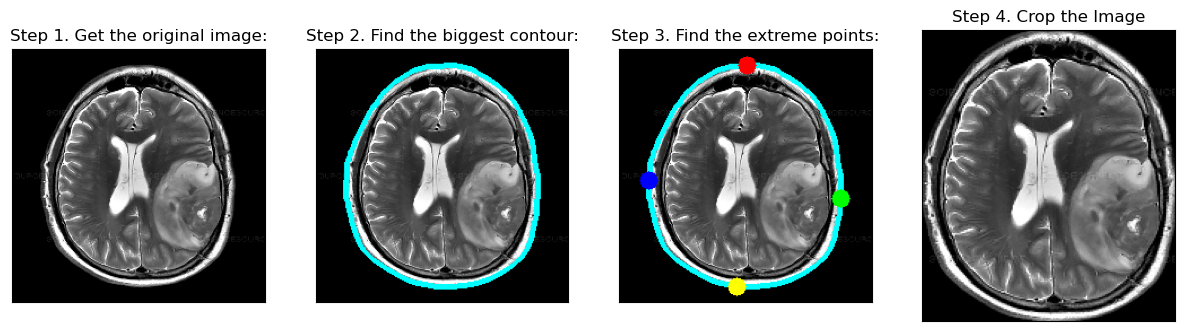

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image:')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour:')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points:')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the Image')
plt.show()

We can apply this for each set:

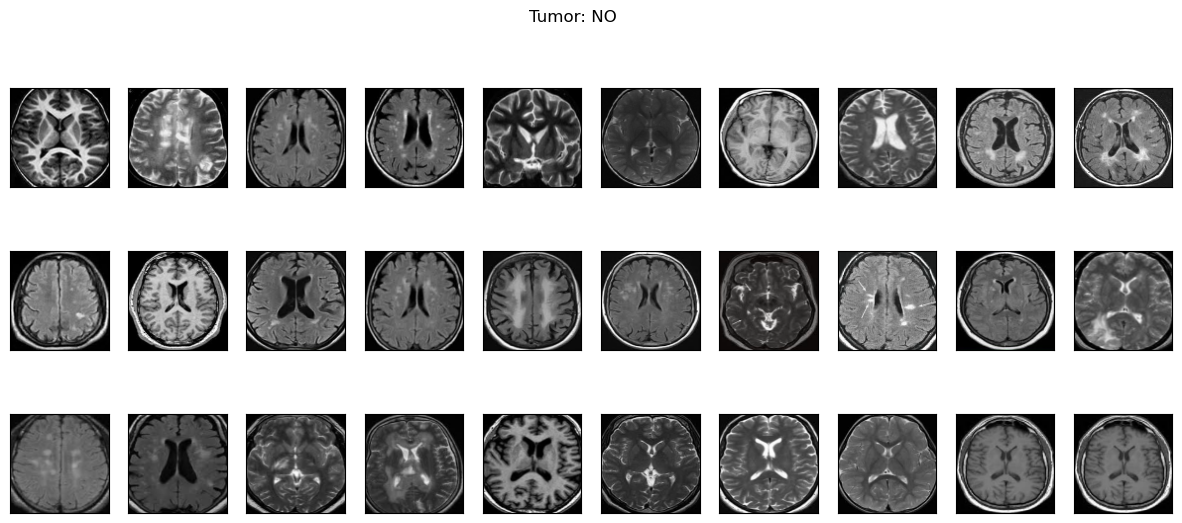

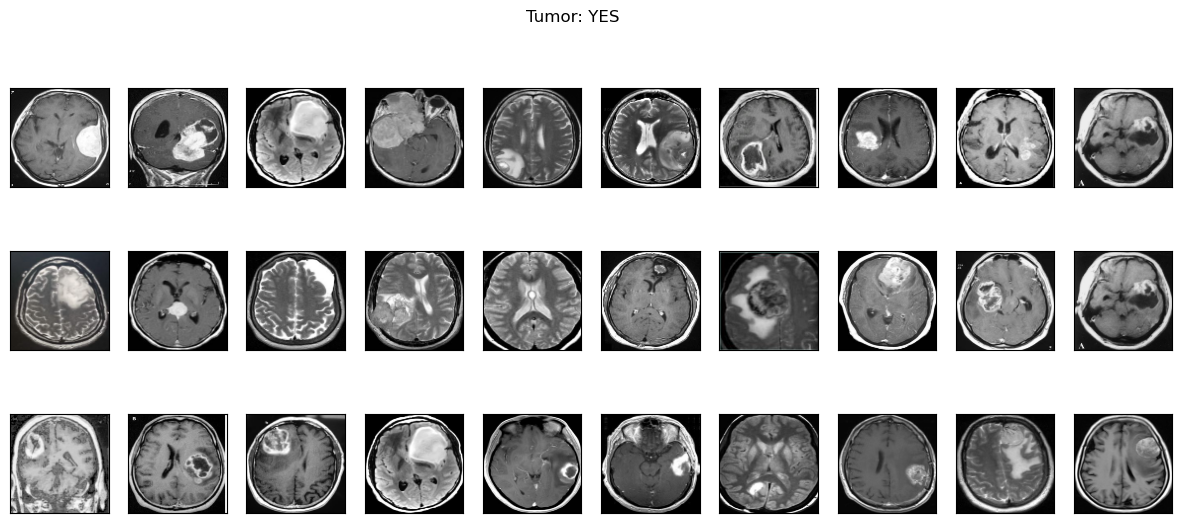

In [12]:
X_train_crop = crop_imgs(set_name = X_train)
X_val_crop = crop_imgs(set_name = X_val)
X_test_crop = crop_imgs(set_name = X_test)

plot_samples(X_train_crop, y_train, labels, 30)

In [13]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [14]:
# saving new images to the folder
!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP\YES TRAIN_CROP\NO TEST_CROP\YES TEST_CROP\NO VAL_CROP\YES VAL_CROP\NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

The next step would be to resize the images to `(224, 224)` & applying the preprocessing steps required for VGG-16 model output.

In [15]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        # Resize the image using cubic interpolation
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        # Apply VGG-15 preprocessing to the resized image
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [16]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

# <a id = 'cnn'>Convolutional Neural Network (CNN) Model:</a>
I have used `Transfer Learning` with `VGG-16` architecture & weights as a base model.
## <a id = 'aug'>Data Augmentation:</a>
Since we have a small dataset to work with, we apply a technique called `Data Augmentation` which helps in "increasing" the size of the training set.
### <a id = 'demo'>Demonstration:</a>
Here's an example of Data Augmentation applied on one image.

In [17]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,                  # Range of rotation (in degrees)
    width_shift_range=0.05,             # Range for horizontal shift
    height_shift_range=0.05,            # Range for vertical shift
    rescale=1./255,                     # Rescaling factor
    shear_range=0.05,                   # Shear intensity range
    brightness_range=[0.1, 1.5],        # Range for brightness adjustment
    horizontal_flip=True,               # Randomly flip images horizontally
    vertical_flip=True)                  # Randomly flip images vertically

In [18]:
os.mkdir('preview')  # Create a directory named 'preview'

x = X_train_crop[0]  # Take the first image from the preprocessed training set
x = x.reshape((1,) + x.shape)  # Reshape the image

i = 0
# Iterate through augmented images generated by the data generator
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:  # Limit the number of generated images
        break

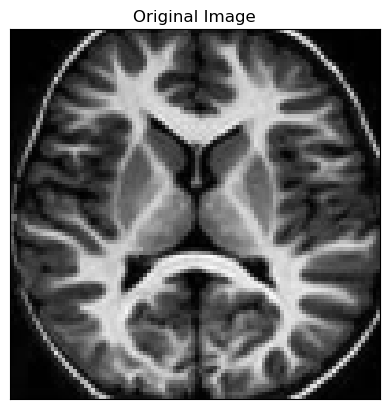

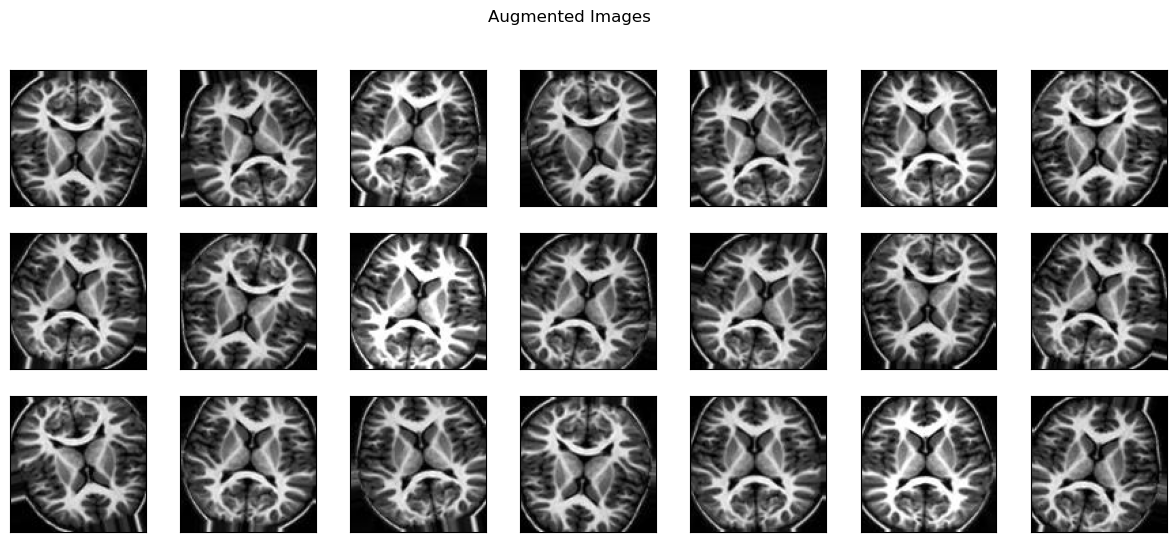

In [19]:
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

# Display a selection of augmented images
plt.figure(figsize=(15,6))
i = 1
# Iterate through the augmented images saved in the 'preview' directory
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)  # Read the augmented image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color format to RGB
    plt.subplot(3,7,i)  # Create a subplot
    plt.imshow(img)  # Display the augmented image
    plt.xticks([])  
    plt.yticks([])  
    i += 1
    if i > 3*7:  # Limit the number of displayed augmented images
        break
plt.suptitle('Augmented Images')
plt.show()

In [20]:
rmdir /s /q preview

### <a id = 'apply'>Application:</a>
We will now apply Data Augmentation on every image.

In [21]:
# Set up directories for training and validation data
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'

# Initialize image data generators for training and testing
train_datagen = ImageDataGenerator(
    rotation_range=15,                    # Range of rotation (in degrees)
    width_shift_range=0.1,                # Range for horizontal shift
    height_shift_range=0.1,               # Range for vertical shift
    shear_range=0.1,                      # Shear intensity range
    brightness_range=[0.5, 1.5],          # Range for brightness adjustment
    horizontal_flip=True,                 # Randomly flip images horizontally
    vertical_flip=True,                   # Randomly flip images vertically
    preprocessing_function=preprocess_input) # Preprocessing function (VGG-15)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input) # Preprocessing function (VGG-15)


# Set up data generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',                     # Color mode for images
    target_size=IMG_SIZE,                 # Target size for images
    batch_size=32,                        # Batch size
    class_mode='binary',                  # Class mode (binary classification)
    seed=RANDOM_SEED)                     # Random seed for reproducibility


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',                     # Color mode for images
    target_size=IMG_SIZE,                 # Target size for images
    batch_size=16,                        # Batch size
    class_mode='binary',                  # Class mode (binary classification)
    seed=RANDOM_SEED)                     # Random seed for reproducibility



Found 193 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


## <a id = 'build'>Building the Model:</a>

In [22]:
# Path to the pre-trained VGG-16 weights file
vgg16_weight_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the VGG-16 model without the top layers
base_model = VGG16(
    weights=vgg16_weight_path,  # Initialize model with pre-trained weights
    include_top=False,           # Exclude top (classification) layers
    input_shape=IMG_SIZE + (3,))  # Input shape for the model (height, width, channels)

In [23]:
NUM_CLASSES = 1  # Number of output classes (binary classification)
model = Sequential()  # Initialize a Sequential model

# Add the pre-trained VGG-16 model as the first layer
model.add(base_model)

# Flatten the output of the VGG-16 base model
model.add(layers.Flatten())

# Add a Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

# Add a Dense layer for binary classification with sigmoid activation
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

# Freeze the weights of the pre-trained VGG-16 model
model.layers[0].trainable = False

# Compile the model with binary cross-entropy loss, RMSprop optimizer, and accuracy metric
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
EPOCHS = 50  # Number of epochs for training
es = EarlyStopping(
    monitor='val_acc',  # Monitor validation accuracy
    mode='max',         # Maximize the monitored quantity
    patience=6)         # Number of epochs with no improvement after which training will be stopped


# Train the model using the fit_generator method
history = model.fit(
    train_generator,                # Training data generator
    steps_per_epoch = 100,           # Number of batches to yield from the generator per epoch
    epochs = EPOCHS,                # Number of epochs for training
    validation_data = validation_generator, # Validation data generator
    validation_steps = 25,          # Number of validation steps to perform after each epoch
    callbacks = [es])               # List of callbacks to apply during training

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.5482 - loss: 4.0181 - val_accuracy: 0.5800 - val_loss: 2.1794
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 227ms/step - accuracy: 0.5931 - loss: 3.4228 - val_accuracy: 0.7600 - val_loss: 3.0476
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 258ms/step - accuracy: 0.5614 - loss: 5.9192 - val_accuracy: 0.7400 - val_loss: 1.7894
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 222ms/step - accuracy: 0.5832 - loss: 5.9491 - val_accuracy: 0.7200 - val_loss: 1.4172
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 249ms/step - accuracy: 0.5820 - loss: 4.1419 - val_accuracy: 0.8000 - val_loss: 1.5536
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.6933 - loss: 2.3203 - val_accuracy: 0.8000 - val_loss: 1.4364
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.6429 - loss: 3.0100 - val_accuracy: 0.7400 - val_loss: 1.5263
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.6709 - loss: 3

100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - accuracy: 0.8331 - loss: 0.9870 - val_accuracy: 0.9200 - val_loss: 0.2893


## <a id = 'perf'>Model Performance:</a>

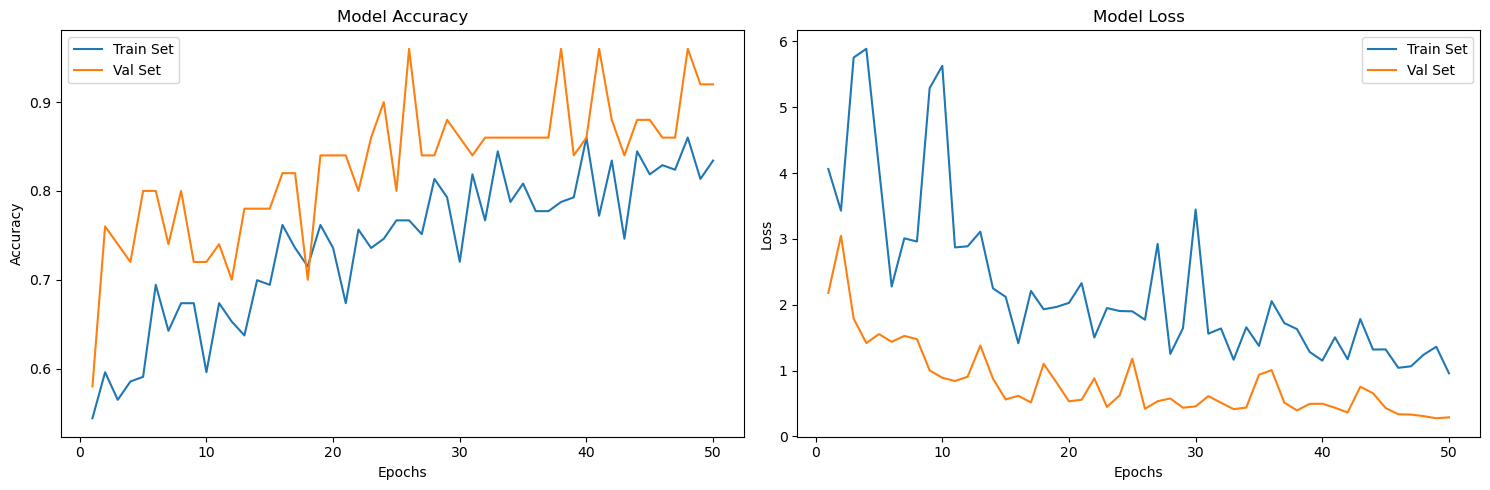

In [25]:
# Extracting accuracy, validation accuracy, loss, and validation loss 
# from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Range of epochs
epochs_range = range(1, len(history.epoch) + 1)

# Plotting model performance
plt.figure(figsize=(15,5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')  # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Val Set')  # Plot validation accuracy
plt.legend(loc="best")  
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  
plt.title('Model Accuracy')  

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')  # Plot training loss
plt.plot(epochs_range, val_loss, label='Val Set')  # Plot validation loss
plt.legend(loc="best")  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.title('Model Loss')  

plt.tight_layout()  
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
Val Accuracy = 0.92


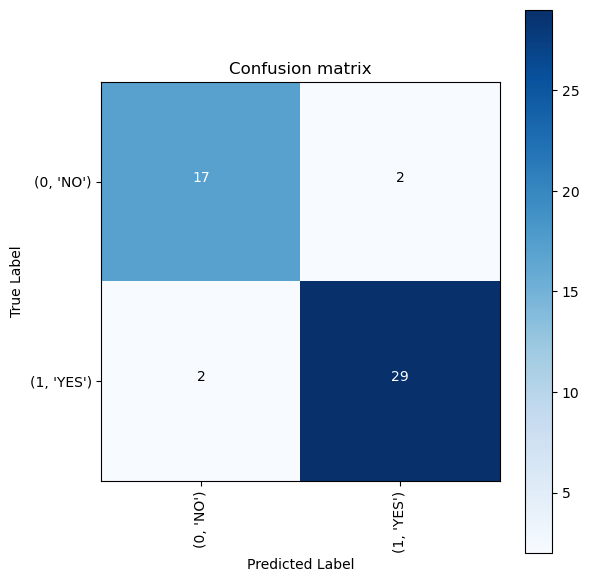

In [26]:
# Make predictions on the validation set
predictions = model.predict(X_val_prep)

# Convert probability predictions to binary predictions (0 or 1) 
# based on a threshold of 0.5
predictions = [1 if x > 0.5 else 0 for x in predictions]

# Calculate accuracy using the accuracy_score function from sklearn
accuracy = accuracy_score(y_val, predictions)

# Print the validation accuracy
print('Val Accuracy = %.2f' % accuracy)

# Generate a confusion matrix to evaluate the model's performance
confusion_mtx = confusion_matrix(y_val, predictions)

# Plot the confusion matrix using the plot_confusion_matrix function
# This function should be defined or imported from a 
# library like scikit-learn or matplotlib.
cm = plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step
Test Accuracy = 1.00


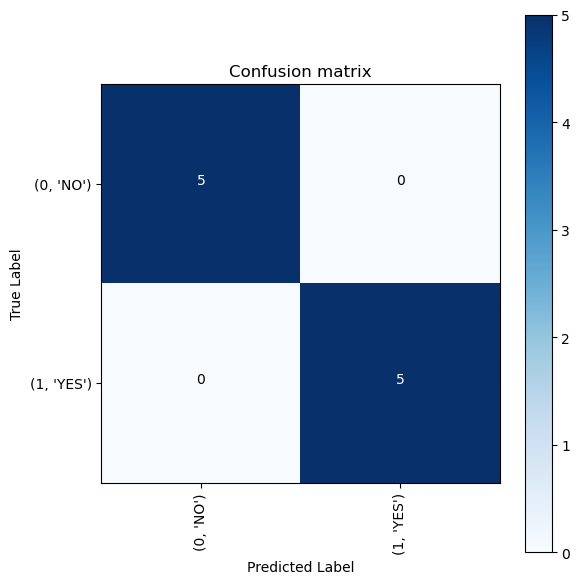

In [27]:
# Make predictions on the test set
predictions = model.predict(X_test_prep)

# Convert probability predictions to binary predictions 
# (0 or 1) based on a threshold of 0.5
predictions = [1 if x > 0.5 else 0 for x in predictions]

# Calculate accuracy using the accuracy_score function from sklearn
accuracy = accuracy_score(y_test, predictions)

# Print the test accuracy
print('Test Accuracy = %.2f' % accuracy)

# Generate a confusion matrix to evaluate the model's performance on the test set
confusion_mtx = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using the plot_confusion_matrix function
# This function should be defined or imported from a library like 
# scikit-learn or matplotlib
cm = plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

Now let's take a look at the images from the test set that were misclassified:

In [28]:
# Find indices of misclassified images where y_test does not match predictions
ind_list = np.argwhere((y_test == predictions) == False)[:, -1]

# Check if there are any misclassified images
if ind_list.size == 0:
    print('There are no misclassified images.')
else:
    # If there are misclassified images, plot each of them
    for i in ind_list:
        # Create a new figure for each misclassified image
        plt.figure()
        # Plot the misclassified image
        plt.imshow(X_test_crop[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Predicted Class: {predictions[i]}')
        plt.show()

There are no misclassified images.


# <a id='concl'>Conclusions:</a>
This project was a combination of CNN model classification problem (to predict whether the subject has a brain tumor or not) & Computer Vision problem (to automate the process of brain cropping from MRI scans).  
The final accuracy is much higher than 50% baseline (random guess). However, it could be increased by larger number of train images or through model hyperparameters tuning.